In [245]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [246]:
from __future__ import division
import numpy as np
c = 3e8
G = 6.67e-11
Msolar = 2e30
AU = 1.49e11 #meters
pc = 3.086e16 #parsec in m

In [247]:
%matplotlib inline
import OrbitalMotion as orb
from plot import *

#Set up initial system parameters
m0 = 30*Msolar
m1 = 30*Msolar
f1 = 1e-3 #orbital frequency
e1 = 0.5 #eccentricity
beta=10
m2 = 10*Msolar
e2 =0.6
I = 60 * np.pi/180.0 #Inclination
gamma = np.pi/4
nmodes = 20 #number of modes to sum over for GW
iota = 20 * np.pi/180  #angle of L vector w.r.t observer LOS 
D = 1e6 * pc #distance from source to observer 1Mpc

#And some integration parameters
Tint = 0.1 #years 0.01
fs = 2e-4 #effective sampling frequency

max_f = fs/2
min_f = 1 / (Tint * 365*24*3600)


print (Tint*365*24*3600 *fs)

630.72


In [248]:
#Get the numerical orbital motion
numerical_motion = orb.get_orbital_evolution_numerical(m0,m1,f1,e1,beta,m2,e2,I,gamma,Tint,fs)

5000.0 3153600.0
Numerical evolution has completed


In [249]:
#Get the analytical orbital motion
motion = orb.get_orbital_evolution_play(m0,m1,f1,e1,beta,m2,e2,I,gamma,Tint,fs)

Getting the orbit
edot = 1.0785701111848944e-06
dg =  4.7285366544678975e-06
da =  -0.016267506889648106
Crpime =  -6.752505469155555e+23


Plotting the orbital parameter evolution
Eeval: 0.6290373835860866 0.4071513196592232 0.22188606392686344 0.5180943516226549 0.018094351622654936
0.5180943516226549 0.5 0.018094351622654936
0.5
0.11094303196343172
EMAX: 0.6290373835860866 0.6290326094870456 0.6109430319634317


/Users/tomkimpson/PhD/PI/PI Work/Jupyter/Code/plot.py:248: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.5, top=0.5
  ax4.set_ylim(min(e1[0:ind]),max(e1[0:ind]))
/Users/tomkimpson/PhD/PI/PI Work/Jupyter/Code/plot.py:249: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.7853981633974483, top=0.7853981633974483
  ax5.set_ylim(min(g1[0:ind]),max(g1[0:ind]))
/Users/tomkimpson/PhD/PI/PI Work/Jupyter/Code/plot.py:250: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=587465609.3038191, top=587465609.3038191
  ax6.set_ylim(min(a1[0:ind]),max(a1[0:ind]))


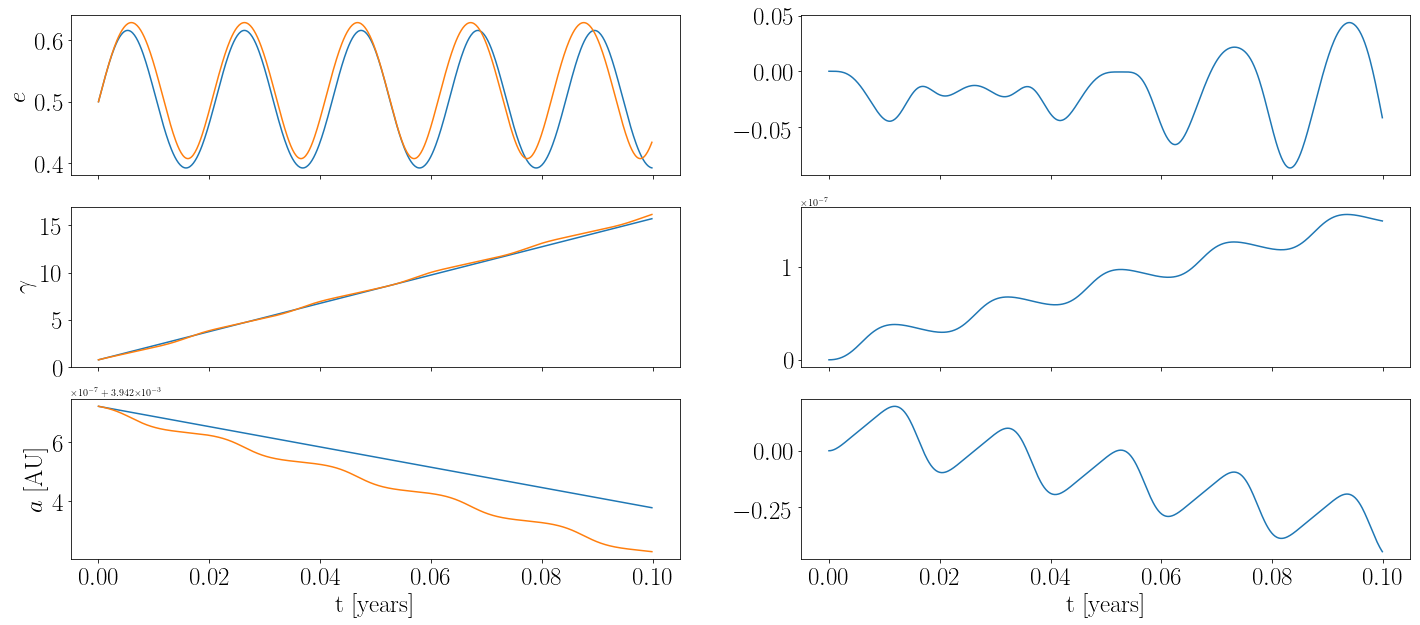

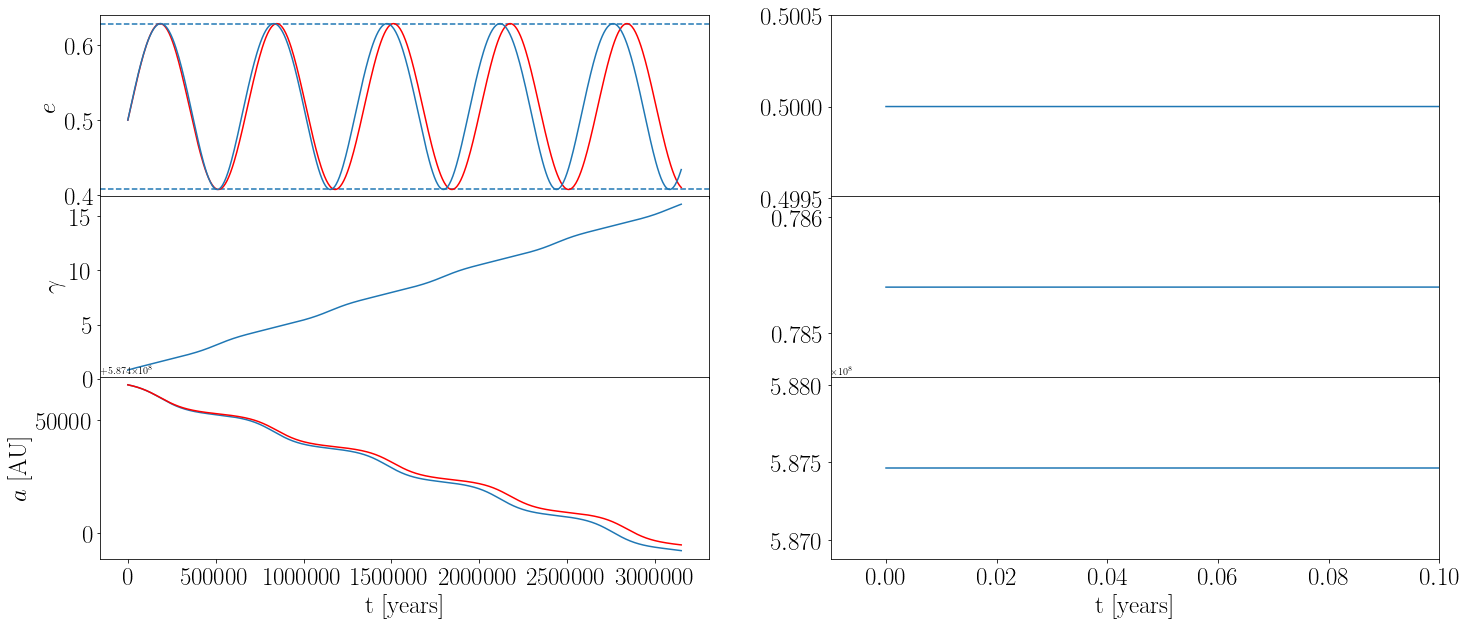

In [260]:
plot_compare_motion(motion,numerical_motion)
plot_motion(numerical_motion)

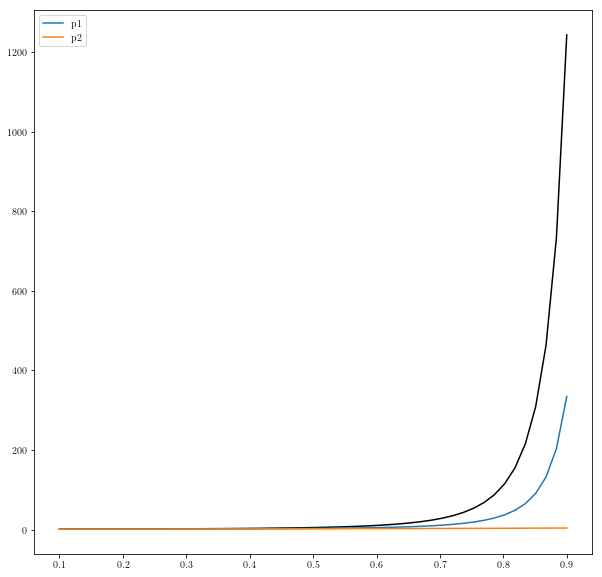

In [251]:
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot2grid((1,1), (0,0))

e = np.linspace(0.1,0.9,50)
fe = (1-e**2)**(-7/2) * (1 + 73/24 * e**2 + 37/96 * e**4)
part1 = (1-e**2)**(-7/2)
part2 = (1 + 73/24 * e**2 + 37/96 * e**4)

ax1.plot(e,fe,c='k')
ax1.plot(e,part1,label='p1')
ax1.plot(e,part2,label='p2')
ax1.legend()